---
# Coleta e análise de dados do Twitter utilizando a biblioteca Tweepy
## Caio Luna

## 1. Estudo comparativo entre dois perfis de usuários 

Com o auxílio da biblioteca Tweepy, é possível coletar amostras de Tweets e Retweets dos usuários, dados de suas contas, informações sobre as *Trends Topics* entre outras informações.

Para o uso efetivo da biblioteca é necessário cadastrar sua aplicação na plataforma de desenvolvedor do Twitter (disponível **[Aqui](https://developer.twitter.com/)**) onde é necessário responder alguns questionários sobre como será utilizada e qual a finalidade do uso da API.

Depois que a aplicação foi efetivamente registrada, é necessário copiar quatro informações, são elas:
* *Consumer API key*
* *Consumer API secret key*
* *Access token*
* *Access token secret*

Com elas, o código poderá se comunicar com a API do Twitter passando as credenciais da aplicação registrada na plataforma de desenvolvedor.

Abaixo estão presentes as bibliotecas importadas para a devida funcionalidade do código.

In [1]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
%matplotlib inline

Por segurança, é viável que cada desenvolvedor **utilize suas chaves e tokens de acessos individualmente**, sem a divulgação das mesmas para a comunidade, então para começar a estudar a biblioteca, substitua os caracteres **XXX** abaixos pelas chaves e tokens da sua aplicação que foi registrada na plataforma do Twitter.

In [2]:
#Autenticações para uso da API
consumer_key = 'XXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_token_secret = 'XXX'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Agora que já importamos as bibliotecas que serão utilizadas e já possuímos acesso a API do Twitter, podemos começar a escrever o código de acordo com nossas necessidades.

A função `info_usuario()` que foi criada, é utilizada para resgatar informações do usuário que é passado como parâmetro e guarda as informações em uma lista criada pra cada usuário.
Nesta função, é chamado o metodo `get_user()` que retorna um **Objeto de Usuário** com todas as informações dísponiveis, no nosso caso, iremos utilizar algumas dessas informações, são elas:
* Nome
* Local
* Descrição
* Total de seguidores
* Total de pessoas seguidas pelo perfil
* Data de criação da conta
* Total de likes dado pelo perfil
* Verificação da conta
* Total de Tweets e Retweets

Para realizar o estudo comparativo entre duas contas, serão utilizadas as atuais contas do Twitter do atual presidente do Brasil, Jair Messias Bolsonaro e do ex-presidente, Luiz Inácio Lula da Silva.

**Vale ressaltar que os resultados que serão encontrados abaixo podem sofrer alterações, pois estamos tratando de uma rede social muito volátil, que está em constante modificação por parte dos usuários. Além disto, os dados coletados estão disponíveis nos próprios perfis dos usuários analisados.**

In [3]:
#Verifica as informações dos usuários 
def info_usuario(user, lista_usuario):
    #Recupera as informações do usuário e adiciona as características solicitadas em uma lista  
    usuario = api.get_user(user)
    nome = usuario.name
    lista_usuario.append(nome)
    local = usuario.location
    lista_usuario.append(local)
    descricao = usuario.description
    lista_usuario.append(descricao)
    totalseguidores = usuario.followers_count
    lista_usuario.append(totalseguidores)
    totalseguidos = usuario.friends_count
    lista_usuario.append(totalseguidos)
    criacao = usuario.created_at
    lista_usuario.append(criacao)
    totallikes = usuario.favourites_count
    lista_usuario.append(totallikes)
    verificacao = usuario.verified
    lista_usuario.append(verificacao)
    totaltweets = usuario.statuses_count
    lista_usuario.append(totaltweets)
    print('\nNome:', nome,'\nLocal:', local,'\nDescrição:', descricao,'\nQuant. Seguidores:', totalseguidores,
          '\nQuant. Seguidos:', totalseguidos,'\nData de Criação:', criacao,'\nQuant. Likes:', totallikes,
          '\nConta Verificada:', verificacao, '\nQuant. Tweets:', totaltweets)
    
#Chama a função com o usuários passando como parâmetro o nome da conta e uma lista para guardar as informações 
lista_bolsonaro = []
info_usuario('jairbolsonaro', lista_bolsonaro)
lista_lula = []
info_usuario('LulaOficial', lista_lula)


Nome: Jair M. Bolsonaro 
Local: Brasília, Brazil 
Descrição: Capitão do Exército Brasileiro, eleito 38° Presidente da República Federativa do Brasil. 🇧🇷 
Quant. Seguidores: 4612043 
Quant. Seguidos: 345 
Data de Criação: 2010-03-31 23:13:44 
Quant. Likes: 2036 
Conta Verificada: True 
Quant. Tweets: 7088

Nome: Lula 
Local:  
Descrição: Ex-presidente da República do Brasil (2003-2010). Preso político desde 7 de abril de 2018. 
Quant. Seguidores: 876015 
Quant. Seguidos: 623 
Data de Criação: 2014-07-22 21:36:50 
Quant. Likes: 2613 
Conta Verificada: True 
Quant. Tweets: 18545


---
Também podemos verificar quantos e quais são os perfis que os dois usuários seguem e quantos perfis seguem os dois usuários simultaneamente, na função `info_usuario_amizade_comum()` e na `info_usuario_seguidores_comum()` que foram criadas abaixo, passamos como parâmetro os dois usuários para encontrar quais os perfis que tem os dois usuários como seus seguidores e a quantidade de perfis que seguem os dois, respectivamente. 

Na primeira função `info_usuario_amizade_comum()` com auxílio do método `friends_ids()` que retorna uma **Lista de Inteiros** com os IDs (identificadores únicos de cada perfil) que o usuários seguem, é possível verificar quais os perfis os dois seguem simultaneamente com a utilização de dois laços simples e chamamos novamente a função anteriormente citada `info_usuario()` para uma amostra mais detalhada sobre esses perfis.

In [4]:
#Verifica os perfis que os dois usuários seguem "Amigos em Comuns"
print('Informações sobre os perfis que os dois usuários seguem:')
def info_usuario_amizade_comum(user1, user2):
    lista_amigos = []
    amizade_comum = 0
    seguidos_user1 = api.friends_ids(user1)
    seguidos_user2 = api.friends_ids(user2)
    for i in seguidos_user1:
        for ii in seguidos_user2:
            if i == ii:
                amizade_comum += 1
                info_usuario(i, lista_amigos)

#Chama a função passando os dois usuários como parâmetro para comparação
info_usuario_amizade_comum('jairbolsonaro', 'LulaOficial')

Informações sobre os perfis que os dois usuários seguem:

Nome: Lenín Moreno 
Local: Ecuador 
Descrição: Esposo, padre, abuelo y Presidente Constitucional de la República del Ecuador🇪🇨, con la certeza de que el poder es un ejercicio de humildad. #ElGobiernoDeTodos 
Quant. Seguidores: 706005 
Quant. Seguidos: 38 
Data de Criação: 2012-10-29 19:54:52 
Quant. Likes: 131 
Conta Verificada: True 
Quant. Tweets: 2736

Nome: Câmara dos Deputados 
Local: Brasília, Brasil 
Descrição: Perfil oficial da Câmara dos Deputados com notícias sobre votações e debates. 
Quant. Seguidores: 798466 
Quant. Seguidos: 512 
Data de Criação: 2009-07-31 18:44:16 
Quant. Likes: 1772 
Conta Verificada: True 
Quant. Tweets: 17343

Nome: teleSUR TV 
Local: Caracas 
Descrição: Con más 40 corresponsales en el mundo, alzamos nuestra voz donde otros medios callan.
teleSUR es la señal informativa de América Latina 
Quant. Seguidores: 1682179 
Quant. Seguidos: 287 
Data de Criação: 2009-06-05 22:21:49 
Quant. Likes: 916 

---
Já na segunda função `info_usuario_seguidores_comum()` é utilizada o método `followers_ids()` que também retorna uma **Lista de Inteiros** com os IDs dos seguidores do usuário, também utilizando dois laços simples, encontramos a quantidade de perfis que seguem os dois simultaneamente.

In [5]:
#Verifica quantos seguidores seguem os dois usuarios simultaneamente
def info_usuario_seguidores_comum(user1, user2):
    seguidores_comum = 0
    seguidores_user1 = api.followers_ids(user1)
    seguidores_user2 = api.followers_ids(user2)
    for i in seguidores_user1:
        for ii in seguidores_user2:
            if i == ii:
                seguidores_comum += 1
    print('\nDos', lista_bolsonaro[3], 'perfis que seguem o', lista_bolsonaro[0], 
          'e dos', lista_lula[3], 'perfis que seguem o', lista_lula[0], 'apenas', 
          seguidores_comum, 'perfis seguem os dois usuários simultaneamente!')
#Chama a função passando os dois usuários como parâmetro para comparação
info_usuario_seguidores_comum('jairbolsonaro', 'LulaOficial')


Dos 4612043 perfis que seguem o Jair M. Bolsonaro e dos 876015 perfis que seguem o Lula apenas 89 perfis seguem os dois usuários simultaneamente!


## 2. Plotagem de Gráficos

Com as informações dos dois usuários que resgatamos anteriormente, podemos começar a iniciar a plotagem de alguns gráficos.
Nos exemplos abaixo foi criado alguns Data Frame com as informações necessárias para plotar o gráfico.

Os valores sobre a quantidade de seguidores foram extraídos pela função `info_usuario()` são passados para uma lista chamada `data` que é utilizada como parâmetro da função `informa_valor()`, ela foi criada para ser passada nas características do grafico `autopct` no método `plot.pie`, com a função `informa_valor()`, é calculada o tamanho de cada fatia da pizza para os dois usuários e retorna o valor dos seguidores que os dois perfis possuem.

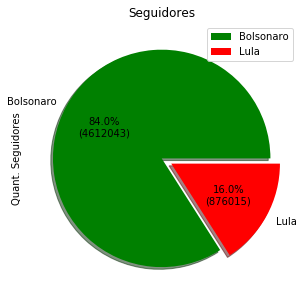

In [6]:
#Criando um DataFrame para uso do gráfico
df = pd.DataFrame({'Quant. Seguidores': [lista_bolsonaro[3], lista_lula[3]]})
data = [lista_bolsonaro[3], lista_lula[3]]
def informa_valor(pct, valores):
    absolute = int(pct/100.*np.sum(valores))
    return "{:.1f}%\n({:d})".format(pct, absolute)

#Plotando o gráfico de pizza
df.plot.pie(y='Quant. Seguidores', explode=(0,0.1), labels = ['Bolsonaro', 'Lula'], title='Seguidores', 
            figsize=(10, 5), colors=['green', 'red'], shadow=True, autopct=lambda pct: informa_valor(pct, data))

---
O modelo de gráfico gerado foi em forma de pizza, nele podemos observar a quantidade de seguidores que cada usuário tem. É possível observar que há uma grande superioridade na quantidade de seguidores em um dos perfis comparados, onde no total de seguidores dos dois, aproximadamente **84.0%** seguem o atual presidente do Brasil e **16.0%** seguem o ex-presidente.

O gráfico a seguir utiliza da mesma ideia do discutido anteriormente, porém aqui iremos analisar a quantidade de tweets e retweets dos dois perfis desde a data da sua criação.

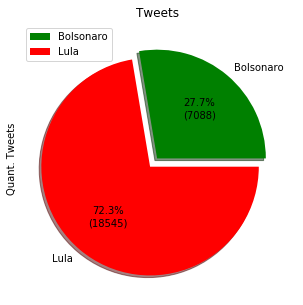

In [7]:
#Criando um DataFrame para uso do gráfico
df = pd.DataFrame({'Quant. Tweets': [lista_bolsonaro[8], lista_lula[8]]})
data = [lista_bolsonaro[8], lista_lula[8]]
def informa_valor(pct, valores):
    absolute = int(pct/100.*np.sum(valores))
    return "{:.1f}%\n({:d})".format(pct, absolute)

#Plotando o gráfico de pizza
df.plot.pie(y='Quant. Tweets', explode=(0,0.1), labels = ['Bolsonaro', 'Lula'], title='Tweets', 
            figsize=(10, 5), colors=['green', 'red'], shadow=True, autopct=lambda pct: informa_valor(pct, data))

---
No novo gráfico gerado, é possível ver uma maior “movimentação” no perfil do ex-presidente, onde possui mais de **70.0%** do total de tweets e retweets dos dois perfis. 

Vale salientar que a data da criação do perfil do atual presidente foi no dia **31/03/2010** e a do ex-presidente foi em **22/07/2014** (segundo resultado da função `infor_usuario()`), ou seja, o perfil do ex-presidente é pouco mais de **quatro anos mais novo** que o perfil do atual presidente, mas mesmo assim, ele utilizou os tweets e retweets em uma quantidade bem maior. Esse fato indica que há uma utilização mais assídua da rede social por parte do perfil do ex-presidente.

O próximo gráfico faz uma relação direta na quantidade dos Perfis Seguidos e os Likes dos dois perfis utilizando o metodo `plot.bar()`.

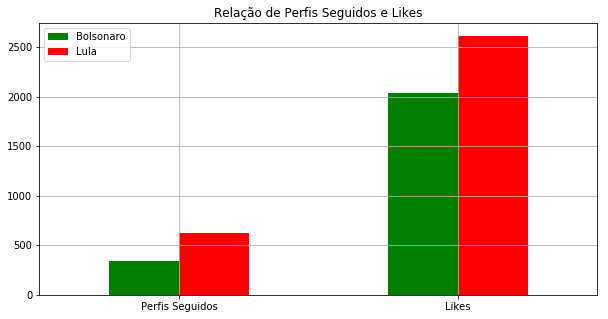

In [8]:
#Criando um DataFrame para uso do gráfico
df = pd.DataFrame({'Bolsonaro': [lista_bolsonaro[4], lista_bolsonaro[6]], 'Lula': [lista_lula[4], lista_lula[6]]}, 
                 index=['Perfis Seguidos', 'Likes'])

#Plotando o gráfico de barras
df.plot.bar(rot=0, color=['green','red'], grid=True, title='Relação de Perfis Seguidos e Likes', figsize=(10, 5))

---
Com o gráfico de barras gerado, é possível constatar que a o perfil do ex-presidente segue um quantidade maior de perfis e utiliza mais o botão de *like*, fato este que é mais um indício que o perfil do ex-presidente realiza mais interações na rede social em comparação ao perfil do atual presidente.

## 3. Extração de Tweets

Para realizar mais algumas análises, também podemos recuperar uma quantidade de Tweets e Retweets dos dois perfis analisados. Para isto, iremos utilizar o método `user_timeline()` que retorna uma **Lista de Objetos** do tipo **Status**.

Dentro da função `extrair_tweets()` há um laço para separar apenas as informações que desejamos, no caso, no método `sub()` é separada a *url* do tweet (que no momento não nos interessa) e pega apenas o texto do Tweet ou do Retweet.

In [9]:
#Verifica e guarda em uma lista os Tweets e os Retweets dos usuários
def extrair_tweets(nome_usuario, inclui_retweet=True):
    resultados = api.user_timeline(screen_name=nome_usuario, count=200, 
                                   tweet_mode='extended', include_rts=inclui_retweet)
    tweets = []
    for s in resultados:
        tweet = re.sub(r'http\S+', '', s.full_text)
        tweets.append(tweet.replace('\n', ' '))
    return tweets

Ao chamar a função `extrair_tweets()` é necessário passar como parâmetro o nome do usuário que você deseja coletar os Tweets e outro parâmetro *booleano* onde: 
* *True* indica que a função retornará Tweets e Retweets 
* *False* indica que a função retornará apenas Tweets

O método `user_timeline()` possui uma limitação na recuperação dos tweets de no máximo 200, dísponivel **[Aqui](https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline.html)** para mais informações sobre.

Para visualizar os últimos Tweets dos dois usuários, basta executar as duas caixas de códigos abaixo:

In [ ]:
#Chama a função passando como parâmetro o usuário e se a pesquisa vai incluir os Retweets ou não
tweets_bolsonaro = extrair_tweets('jairbolsonaro', True)
for i in tweets_bolsonaro:
    print('\n', i)

In [ ]:
#Chama a função passando como parâmetro o usuário e se a pesquisa vai incluir os Retweets ou não
tweets_lula = extrair_tweets('LulaOficial', True)
for i in tweets_lula:
    print('\n', i)

Agora que já temos um meio de extrair os Tweets e Retweets, podemos plotar mais um gráfico de barras para análisar o resultado.

Abaixo, chamamos a função `extrair_tweets()` passando como parâmetro o nome do usuário e a opção *booleano False*, o que indica que o retorno a função será apenas dos Tweets feitos pelo próprio usuário.

Já para calcular a quantidade de Retweets, basta fazer 200 (número máximo disponível para recuperação via `user_timeline()`) e subtrair a quantidade de Tweets feita pelo usuário.

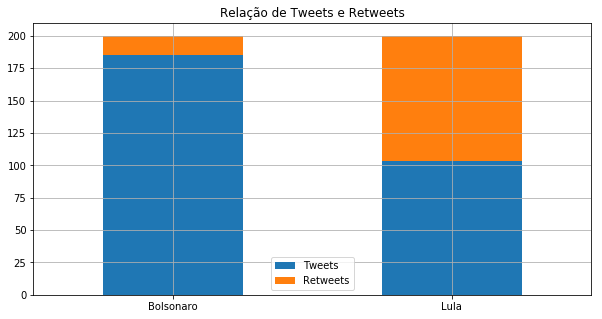

In [12]:
#Verifica quantos Tweets são extraidos
tweet_bolsonaro = len(extrair_tweets('jairbolsonaro', False))
tweet_lula = len(extrair_tweets('LulaOficial', False))

#Criando um DataFrame para uso do gráfico
df = pd.DataFrame({'Tweets': [tweet_bolsonaro, tweet_lula], 'Retweets': [200-tweet_bolsonaro, 200-tweet_lula]}, 
                 index=['Bolsonaro', 'Lula'])

#Plotando o gráfico de barras
df.plot.bar(rot=0, stacked=True, grid=True, title='Relação de Tweets e Retweets', figsize=(10, 5))

---
No gráfico mostrado acima, é possível notar mais uma diferença grande entre os dois perfis, com a extração dos últimos 200 Tweets e Retweets, é possível observar que o perfil do atual presidente utiliza bem menos da opção de Retweet, enquanto ao perfil do ex-presidente que tem o uso contrario.

## 4. Filtrar termos em Tweets e Retweets

Agora já podemos procurar por termos/palavras específicas nos Tweets que foram extraídos anteriormente, abaixo na função `filtrar_tweets_termos()` é possível utilizar de uma lista de palavras para serem pesquisadas nos tweets.

A função apresenta três parâmetros, são eles:
* `lista_tweets_pesquisa` que é onde os Tweets extraídos foram armazenados
* `termo_pesquisa` que é a lista de palavras que seja pesquisada
* `quant_termos` que é uma lista para guarda quantas vezes determinada palavra foi encontrada

Inicialmente preenchemos a quantidade de vezes que os termos são encontrados, ou seja, iniciam com 0, e logo em seguida é feita a busca de cada termo informado na lista nos Tweets e Retweets recuperados, utilizando dois laços para realizar essa pesquisa. O método `search()` é utilizado para pesquisar o termo de forma *case-sensitive*.

In [13]:
#Verifica a quantidade de Tweets e Retweets dos usuários onde menciona um termo específico
def filtra_tweets_termos(lista_tweets_pesquisa, termo_pesquisa, quant_termos):
    for i in range(len(termo_pesquisa)):
        quant_termos.append(0)
    ii = 0
    for termo in termo_pesquisa:
        termos_encontrador = 0
        for tweet_user in lista_tweets_pesquisa:
            if re.search(termo, tweet_user, re.IGNORECASE):
                termos_encontrador += 1
            quant_termos[ii] = termos_encontrador
        ii += 1
        
#Define quais os termos que serão pesquisados
termo_pesquisa = ['bolsonaro', 'lula', 'pt', 'psl', 'previdência', 'arma']

Abaixo efetuamos a extração dos tweets recentes dos usuários, declaramos uma lista vazia para guardar a quantidade de vezes que o termo é encontrado nos Tweets e Retweets de cada usuário e chamamos a função `filtra_tweets_termos()`.

In [14]:
#Extraindo Tweets e Retweets realizando a pesquisa dos termos
tweets_bolsonaro = extrair_tweets('jairbolsonaro', True)
quant_termos_bolsonaro = []
filtra_tweets_termos(tweets_bolsonaro, termo_pesquisa, quant_termos_bolsonaro)

In [15]:
#Extraindo Tweets e Retweets realizando a pesquisa dos termos
tweets_lula = extrair_tweets('LulaOficial', True)
quant_termos_lula = []
filtra_tweets_termos(tweets_lula, termo_pesquisa, quant_termos_lula)

Logo após será criado um Data Frame contendo as informações que foram retornadas da função.

In [16]:
#Criando um DataFrame
df = pd.DataFrame({'Bolsonaro': quant_termos_bolsonaro, 'Lula': quant_termos_lula}, 
                 index=termo_pesquisa)
df

,Bolsonaro,Lula
bolsonaro,16,5
lula,1,133
pt,1,23
psl,0,0
previdência,2,0
arma,5,3


---
Com o Data Frame criado, podemos assim realizar a plotagem do gráfico para visualizarmos graficamente a quantidade de vezes que determinado termo foi encontrados nos tweets dos dois perfis.

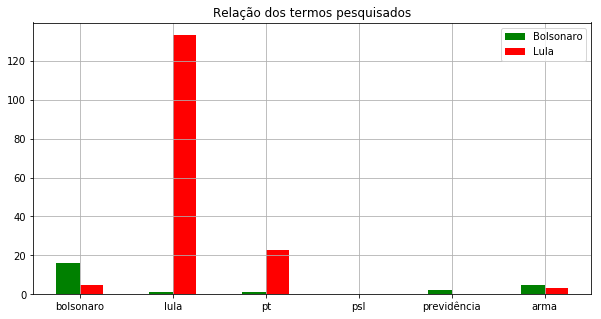

In [17]:
#Plotando o gráfico de barras
df.plot.bar(rot=0, color=['green','red'], grid=True, title='Relação dos termos pesquisados', figsize=(10, 5))

---
## 5. Trends Topics

O nascimento das *Trends Topcis* tem basta interação com o momento atual da região/local de onde se está. Por exemplo, durante os jogos da seleção brasileira feminina e masculina, quando os times estão jogando é normal que nome de jogadores que tenham se destacado no jogo apareça nas *Trends Topics* do Twitter.

Diante disto, a análise sobre os tópicos de tendência são mais difíceis, devido sua **alta taxa de volatilidade**, porem é possível verificar quais as *Trends Topics* do momento.

Primeiramente informamos o identificador da região no qual desejamos verificar os tópicos de tendência **(ID do Brasil é 23424768)** e com o método `trends_place()` é retornado um **Objeto Json** contendo algumas informações sobre os tópicos, como desejamos apenas verificar quais são os top 10 tópicos de tendência, carregamos o resultado do método dentro de uma variável e realizamos a pesquisa das *Trends Topics* e utilizamos um laço para localizar os 10 primeiros tópicos de tendência, e por fim, são impressas na tela.

In [18]:
#Informa o ID do local da pesquisa e captura as tendências do local
codigo_regiao = 23424768 #Código do Brasil
#Coleta as Trends Topics da região solicitada 
def localiza_trends(codigo_regiao):
    top_trends = api.trends_place(codigo_regiao)
    trends = json.loads(json.dumps(top_trends, indent=1))
    max_topic = 0
    top10_trend = []
    #Extrai as Trends
    for trend in trends[0]["trends"]:
        top10_trend.append(trend["name"])
        max_topic += 1
        if max_topic == 10:
            break
    #Imprime os trends topics
    for i in top10_trend:
        print(i)

In [19]:
#Chama a função para localizar as Trends
localiza_trends(codigo_regiao)

WhatsApp
Mark Zuckerberg
Enem
#StrangerThings
Conmebol
Instagram e Facebook
#EntregaOCelularDallagnol
#NEDSWE
João Félix
Halle Bailey


---
No caso abaixo é utilizado o método `trends_closest()` que retorna um **Objeto Json**, nele é informado dados sobre a localidade mais próxima no qual o Twitter ter registros de Trends Topics.

Basta passar como parâmetros do método a latitude e longitude de local, uma das formas mais simples de se obter essa informação é utilizando o [Google Maps](https://www.google.com/maps), logo depois da *url* é possível encontrar essa númeração.

In [20]:
#Localiza qual o local mais próximo de topicos de tendência de acordo com a localização atual
teste = api.trends_closest(-7.2419179,-35.8825136)
localidade = list(teste[0].values())
print('A localidade mais próxima que possui tópicos de tendência é', 
      localidade[0], 'que tem o ID:', localidade[5])

A localidade mais próxima que possui tópicos de tendência é Fortaleza que tem o ID: 455830


---
Agora que já possuímos o ID da região mais próxima a nós, podemos verificar se as mesmas *Trends Topics* do Brasil são as mesmas da região de Fortaleza, como foi dito anteriormente, as *Trends Topics* tem uma forte relação com acontecimentos de uma determinada região, seja um fato histórico, uma tragédia, uma novela ou qualquer outro motivo que seja marcante ou de grande importância para a maioria dos usuários da rede social. 

Basta chamar novamente a função `localiza_trends()` e passar como parâmetro o ID que nos foi retornado (neste caso o de Fortaleza de ID 455830).

In [21]:
#Chama a função para localizar as Trends
localiza_trends(455830)

Argentina
Moro
WhatsApp
Mark Zuckerberg
Enem
#StrangerThings
Conmebol
Instagram e Facebook
#EntregaOCelularDallagnol
#NEDSWE


---
## 6. Conclusões 

Com a elaboração deste projeto, aprendemos a utilizar a biblioteca **Tweepy** para realizar algumas operações essenciais para o objetivo específico do trabalho, como a coleta de Tweets de um perfil específico, a coleta de informações sobre um usuário específico, a forma de organização dos dados do Twitter, as divisões das trends topics por região, a pesquisa de determinados termos dentro de tweets entre outras funcionalidades.

Com a elaboração do projeto acima, foi possível investigar melhor as bibliotecas **Tweepy**, **Re**, **Json**, **Matplotlib**, **Numpy** e **Pandas** que já são bastante conhecidas e vale a pena aprofundar os conhecimentos nelas, pois a possibilidade de utilizarmos em novos projetos é muito grande.

Utilizamos da possibilidades de fazer um estudo comparativo entre dois perfis mas acreditamos que o objetivo geral do trabalho foi alcançado, pois tivemos a ideia de dar uma ampla visão das possibilidade do que se pode fazer com a API do Twitter em suas principais funcionalidades (possibilidades essas que estão fragmentadas por tutoriais na internet, o que dificulta o estudo de quem se interessa no desenvolvimento de pesquisas na área).

## 7. Referências

**Documentações**

* [Tweepy](http://docs.tweepy.org/en/latest/)<br>
* [Numpy](https://docs.scipy.org/doc/numpy/dev/)<br>
* [Pandas](https://pandas.pydata.org/pandas-docs/stable/)<br>
* [Matplotlib](https://matplotlib.org/3.1.0/contents.html)<br>
* [Json](https://docs.python.org/3/library/json.html)<br>
* [Re](https://docs.python.org/3/library/re.html)<br>
* [Developer Twitter](https://developer.twitter.com/en.html)<br>